Data Found!
Making items...
Finished!
Exporting files...
Please enter the filename to open: AK-47 Case Hardened - 4.0.csv
File found! Reading data in...
Segmenting data...
Finding best C and Epsilon values...


C:\Users\ForceM\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best C: 0.15
Best Epsilon: 0.01
Training Linear Regresion...
Testing Linear Regression...
Error for Linear Regression: 0.00200274216093
Training RBF...
Testing RBF...
Error for RBF: 0.000177823601716
Showing graph: 
Actual Data: orange
Linear Regressino: blue
RBF: green


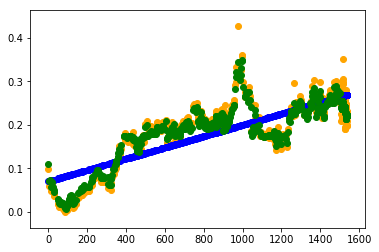

Done!
Please input days on market for item you wish to sell: 50
What is the maximum days you are willing to wait to sell: 31
1. Linear
2. RBF
Please select a type of regression: 2
For given time frame, best day to sell: 60


In [9]:
# %load DataReader.py
import xlrd
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import datetime
import pandas as pd
import csv

class item(): #Our objects of items with their features

    def __init__(self, name, price_history, weapon_type, rarity, wear, stattrak):

        self.name = name
        start_date = datetime.date(2013, 8, 15)
        self.price_history = price_history['prices']
        for i in range(len(self.price_history)):
            date = self.price_history[i][0].split()
            
            month_list = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
            year = date[2]
            day = date[1]
            month = month_list.index(date[0]) + 1
            release_date = datetime.date(int(year), int(month), int(day))
            diff_date = release_date - start_date
            self.price_history[i][0] = diff_date.days
            
        
        self.weapon_type = weapon_type
        self.rarity = rarity
        self.wear = wear
        self.stattrak = stattrak
        self.data = [self.weapon_type, self.rarity, self.wear, self.stattrak]
        self.target = price_history


def makeItems():
    print("Making items...")
    checker = " " #checker will later be set to value in excel file
    item_array = [] #our array our objects
    wears = ["Battle-Scarred", "Well-Worn", "Field-Tested", "Minimal Wear", "Factory New"]
    y = 1
    while(checker != "NULL"):  #checks to see if we are at end of excel file
        if(str(sheet.cell_value(y, 0)) != "NULL"):
            wep_wear = wears[int((sheet.cell_value(y, 4)) - 1)]
            string = str((sheet.cell_value(y, 0)) + " - " + str(wep_wear)) 
            with open("data points/" + string + ".json") as data_file: #opens a json file that has the same name as the name attribute
                data = json.load(data_file) #loads the content of file, which contains an array of its pricing history
                #print(data)
            prices = data
            thing = item(sheet.cell_value(y, 0), prices, sheet.cell_value(y, 2), sheet.cell_value(y, 3), sheet.cell_value(y, 4), sheet.cell_value(y, 5)) #create an object with all of the dat from json and excel file
            item_array.append(thing) #append it to our object list
            
        y = y + 1 #increment and update our checker for the end of the file
        checker = sheet.cell_value(y, 0)
    print("Finished!")
    return item_array






file_location = "C:/Users/ForceM/AppData/Local/Programs/Python/Python35-32/item_prices/DataReader.xlsx" #opens a excel file with our data
print("Data Found!")
workbook = xlrd.open_workbook(file_location)
sheet = workbook.sheet_by_index(0)
items = []
items = makeItems()
print("Exporting files...")
for i in range(len(items)):
    tempMatrix = np.zeros(((len(items[i].price_history)), 6))
    for p in range(len(items[i].price_history)):
        tempMatrix[p] = [items[i].data[0], items[i].data[1], items[i].data[2], items[i].data[3], items[i].price_history[p][0], items[i].price_history[p][1]]
    df = pd.DataFrame(data=tempMatrix.astype(float))
    df.to_csv(str(items[i].name) + " - " + str(items[i].data[2]) + ".csv", header=False, float_format='%.2f', index='False')
    
filepath = input("Please enter the filename to open: ")
print("File found! Reading data in...")
df = pd.read_csv(filepath, sep=',', header=None, dtype={'A': np.int32, 'B': np.int32, 'C': np.int32, 'D': np.int32, 'E': np.int32, 'F': np.float64})
data_in = df.values
print("Segmenting data...")

one_item_matrix = np.zeros(((len(df)), 6)) #take data from the imported csv file
for i in range(len(df)):
    one_item_matrix[i] = [int(data_in[i][1]), data_in[i][2], data_in[i][3], data_in[i][4], data_in[i][5], data_in[i][6]]
    
  

np.random.shuffle(one_item_matrix) #shuffle our data to split for train and test
num_rows, num_cols = one_item_matrix.shape #get number of rows for knowing how to split
num_train = int(num_rows * 0.70) #split for 70% train 
num_test = num_rows - num_train #split for 30% test

price_history = np.zeros((num_train, 1)) #make y-train matrix
items_to_train = np.zeros((num_train, 5)) #make x-train matrix
price_test = np.zeros((num_test, 1)) #make y-test matrix
days_test = np.zeros((num_test, 1)) #make days matrix the size of y-test
days_train = np.zeros((num_train, 1)) #make days matrix the size of y-train
items_to_test = np.zeros((num_test, 5)) #make x-test matrix
        

b = 0
nor_m = np.zeros((num_rows, 1)) #put price into its own matrix to normalize
for h in range(len(one_item_matrix)):
    nor_m[b] = ([one_item_matrix[h][5]])
    b += 1

nor_m = (nor_m - nor_m.min()) / (nor_m.max() - nor_m.min()) #normalize it

#prints normalized data to csv to read
normalized_data = np.zeros(((num_train + num_test), 6))
b = 0
for c in range(num_train + num_test):
    normalized_data[c] = [one_item_matrix[c][0], one_item_matrix[c][1], one_item_matrix[c][2], one_item_matrix[c][3], one_item_matrix[c][4], nor_m[b]]
    b += 1
df = pd.DataFrame(data=normalized_data.astype(float))
df.to_csv("normalized data.csv", header=False, float_format='%.2f', index='False')



#take 70% of our data, and put it into one matrix (normalized prices and features)
n = 0
for k in range(num_train):
    items_to_train[n] = [one_item_matrix[k][0], one_item_matrix[k][1], one_item_matrix[k][2], one_item_matrix[k][3], one_item_matrix[k][4]]
    #price_history[n] = [one_item_matrix[k][5]]
    price_history[n] = nor_m[n]
    days_train[n] = [one_item_matrix[k][4]]
    n += 1


    
#take 30% of our data (or the left overs), and put it into one matrix (normalized prices and features)
m = 0
for v in range(num_test):
    items_to_test[m] = [one_item_matrix[v][0], one_item_matrix[v][1], one_item_matrix[v][2], one_item_matrix[v][3], one_item_matrix[v][4]]
    #price_test[m] = [one_item_matrix[v][5]]
    price_test[m] = nor_m[m]
    days_test[m] = [one_item_matrix[v][4]]
    m += 1
            
        
#rename them to refer to them more easily
items_X_train = np.matrix(items_to_train)
items_Y_train = price_history
items_X_test = np.matrix(items_to_test)
items_Y_test = price_test

#pushing train and test to csv files for reading
df = pd.DataFrame(data=items_X_train.astype(float))
df.to_csv("items_X_train.csv", header=False, float_format='%.2f', index='False')
df = pd.DataFrame(data=items_Y_train.astype(float))
df.to_csv("items_Y_train.csv", header=False, float_format='%.2f', index='False')
df = pd.DataFrame(data=items_X_test.astype(float))
df.to_csv("items_X_test.csv", header=False, float_format='%.2f', index='False')
df = pd.DataFrame(data=items_Y_test.astype(float))
df.to_csv("items_Y_test.csv", header=False, float_format='%.2f', index='False')


#method to find the best C and epsilon
print("Finding best C and Epsilon values...")
best_c = 0
best_ep = 0
smallest_error = 100000000
num_rows, num_cols = items_X_train.shape #get number of rows for knowing how to split
train_train = int(num_rows * 0.70)
train_test = num_rows - train_train
items_Y_train_tr = np.zeros((train_train, 1)) #make y-train matrix
items_X_train_tr = np.zeros((train_train, 5)) #make x-train matrix
items_Y_train_te = np.zeros((train_test, 1)) #make y-test matrix
items_X_train_te = np.zeros((train_test, 5)) #make x-test matrix

for i in range(train_train):
    items_Y_train_tr[i] = items_Y_train[i]
    items_X_train_tr[i] = items_X_train[i]
    
for i in range(train_test):
    shifted_i = i + train_train
    items_Y_train_te[i] = items_Y_train[shifted_i]
    items_X_train_te[i] = items_X_train[shifted_i]
    

for c in np.arange(0.01, 1, 0.01):
    for ep in np.arange(0.01, 1, 0.01):
        svr_rbf_tr = SVR(kernel='rbf', C = c, epsilon = ep)
        rbf_model_tr = svr_rbf_tr.fit(items_X_train_tr, items_Y_train_tr)
        y_rbf_tr = rbf_model_tr.predict(items_X_train_te)
        test_mse = mean_squared_error(items_Y_train_te, y_rbf_tr)
        if(test_mse < smallest_error):
            smallest_error = test_mse
            best_c = c
            best_ep = ep
        else:
            continue
print("Best C: ", end='')
print(best_c)
print("Best Epsilon: ", end='')
print(best_ep)


print("Training Linear Regresion...")
regr = linear_model.LinearRegression()
regr.fit(items_X_train, items_Y_train)

print("Testing Linear Regression...")
items_Y_pred = regr.predict(items_X_test)
df = pd.DataFrame(data=items_Y_pred.astype(float))
df.to_csv("items_Y_pred_linear.csv", header=False, float_format='%.2f', index='False')

print("Error for Linear Regression: ", end="")
print(mean_squared_error(items_Y_test, items_Y_pred))



print("Training RBF...")
svr_rbf = SVR(kernel='rbf', C = best_c, epsilon = best_ep)
rbf_model = svr_rbf.fit(items_X_train, items_Y_train)

print("Testing RBF...")
y_rbf = rbf_model.predict(items_X_test)
df = pd.DataFrame(data=y_rbf.astype(float))
df.to_csv("items_Y_pred_RBF.csv", header=False, float_format='%.2f', index='False')

print("Error for RBF: ", end='')
print(mean_squared_error(items_Y_test, y_rbf))

color_actual = 'orange'
color_linear = 'blue'
color_rbf = 'green'

print("Showing graph: ")
print("Actual Data: " + color_actual)
print("Linear Regressino: " + color_linear)
print("RBF: " + color_rbf)
plt.scatter(days_test, items_Y_test, color= color_actual)
plt.scatter(days_test, items_Y_pred, color= color_linear)
plt.scatter(days_test, y_rbf, color= color_rbf)
plt.show()

print("Done!")

days = int(input("Please input days on market for item you wish to sell: "))
n = int(input("What is the maximum days you are willing to wait to sell: "))
user_item = ([one_item_matrix[0][0], one_item_matrix[0][1], one_item_matrix[0][2], one_item_matrix[0][3], days])
print("1. Linear")
print("2. RBF")
graph_sel = input("Please select a type of regression: ")

#occupy a matrix with the next n days depending on how fast they want to sell
full_user_item = np.zeros((n, 5))
for d in range(n):
    full_user_item[d] = ([one_item_matrix[0][0], one_item_matrix[0][1], one_item_matrix[0][2], one_item_matrix[0][3], days + (d)])


if(graph_sel == '1'):
    example = regr.predict(full_user_item)
    #output prices to csv for reading
    df = pd.DataFrame(data=example.astype(float))
    df.to_csv("user predicted prices.csv", header=False, float_format='%.2f', index='False')

    best_price = example.max()
    index = -1
    for t in range(n):
        if(best_price == example[t]):
            index = t
    best_day = int(full_user_item[index][4])
    print("For given time frame, best day to sell: ", end='')
    print(best_day)
if(graph_sel == '2'):
    example = rbf_model.predict(full_user_item)
    #output prices to csv for reading
    df = pd.DataFrame(data=example.astype(float))
    df.to_csv("user predicted prices.csv", header=False, float_format='%.2f', index='False')
    
    best_price = example.max()
    index = -1
    for t in range(n):
        if(best_price == example[t]):
            index = t
    best_day = int(full_user_item[index][4])
    print("For given time frame, best day to sell: ", end='')
    print(best_day)


In [1]:
print(5)

5
